In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from utils import load_dataframe_csv

import matplotlib.pyplot as plt
from itertools import count

In [2]:
df1 = load_dataframe_csv('random_noise_tables', 'Explainability_CIFAR10.csv')
df5 = load_dataframe_csv('random_noise_tables', 'Explainability_CIFAR10_TRAK.csv')

In [3]:
df = pd.concat([df1, df5])
# df = pd.concat([df4])

In [4]:
df

,data,explainer,scale,coverage,hit_rate,execution_time
0,CIFAR10,YADEA,False,0.903333,1.00,12.946430
1,CIFAR10,YADEA,True,0.206667,0.02,4.660745
2,CIFAR10,RPS,False,0.116667,0.01,2.136416
3,CIFAR10,IF,True,0.130000,0.02,200.735968
4,CIFAR10,TracIn,True,0.130000,0.02,44.333229
...,...,...,...,...,...,...
146,CIFAR10,YADEA,True,0.233333,0.02,4.724610
147,CIFAR10,RPS,False,0.120000,0.01,2.115233
148,CIFAR10,IF,True,0.133333,0.02,200.164577
149,CIFAR10,TracIn,True,0.133333,0.02,42.075688


In [5]:
df['names'] = df['explainer'] +  ["*" if i else "" for i in df['scale'].to_list()]
df['names'][df['names']=='IF*'] = 'IF'
df['data'][df['data']=='OCEA'] = 'OCH'
df['names'] = df['names'].replace({'YADEA': 'HD-EXPLAIN', 'YADEA*': 'HD-Explain*'})


/tmp/ipykernel_86386/2132202268.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['names'][df['names']=='IF*'] = 'IF'
/tmp/ipykernel_86386/2132202268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [6]:
df

,data,explainer,scale,coverage,hit_rate,execution_time,names
0,CIFAR10,YADEA,False,0.903333,1.00,12.946430,HD-EXPLAIN
1,CIFAR10,YADEA,True,0.206667,0.02,4.660745,HD-Explain*
2,CIFAR10,RPS,False,0.116667,0.01,2.136416,RPS
3,CIFAR10,IF,True,0.130000,0.02,200.735968,IF
4,CIFAR10,TracIn,True,0.130000,0.02,44.333229,TracIn*
...,...,...,...,...,...,...,...
146,CIFAR10,YADEA,True,0.233333,0.02,4.724610,HD-Explain*
147,CIFAR10,RPS,False,0.120000,0.01,2.115233,RPS
148,CIFAR10,IF,True,0.133333,0.02,200.164577,IF
149,CIFAR10,TracIn,True,0.133333,0.02,42.075688,TracIn*


In [7]:
grouped = df.groupby('names').agg({
    'coverage': ['mean', 'std'],
    'hit_rate': ['mean', 'std'],
    'execution_time': ['mean', 'std'],
})

result = pd.DataFrame({
    'coverage': grouped['coverage']['mean'].round(2).astype(str) + " ± " + grouped['coverage']['std'].round(2).astype(
        str),
    'hit_rate': grouped['hit_rate']['mean'].round(2).astype(str) + " ± " + grouped['hit_rate']['std'].round(2).astype(
        str),
    'execution_time': grouped['execution_time']['mean'].round(2).astype(str) + " ± " + grouped['execution_time'][
        'std'].round(2).astype(str)
})

# Set the index to 'names'
result.index.name = 'names'
# Optionally, generate a LaTeX table
latex_table = result.to_latex(column_format='|c|c|c|c|', header=True, index=True)
print(latex_table)

\begin{tabular}{|c|c|c|c|}
\toprule
 & coverage & hit_rate & execution_time \\
names &  &  &  \\
\midrule
HD-EXPLAIN & 0.92 ± 0.02 & 0.99 ± 0.01 & 13.04 ± 0.03 \\
HD-Explain* & 0.23 ± 0.02 & 0.01 ± 0.01 & 4.73 ± 0.02 \\
IF & 0.14 ± 0.01 & 0.01 ± 0.01 & 200.86 ± 0.94 \\
RPS & 0.12 ± 0.01 & 0.01 ± 0.01 & 2.12 ± 0.02 \\
TRAK* & 0.48 ± nan & 0.06 ± nan & 1209.38 ± nan \\
TracIn* & 0.14 ± 0.01 & 0.01 ± 0.01 & 43.71 ± 1.04 \\
\bottomrule
\end{tabular}



In [8]:
result

,coverage,hit_rate,execution_time
names,,,
HD-EXPLAIN,0.92 ± 0.02,0.99 ± 0.01,13.04 ± 0.03
HD-Explain*,0.23 ± 0.02,0.01 ± 0.01,4.73 ± 0.02
IF,0.14 ± 0.01,0.01 ± 0.01,200.86 ± 0.94
RPS,0.12 ± 0.01,0.01 ± 0.01,2.12 ± 0.02
TRAK*,0.48 ± nan,0.06 ± nan,1209.38 ± nan
TracIn*,0.14 ± 0.01,0.01 ± 0.01,43.71 ± 1.04


In [9]:
sns.__version__

'0.13.2'

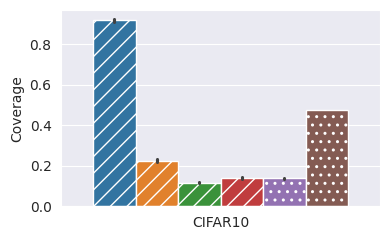

In [11]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(data = df, x='data', y='coverage', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\', '**']
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,4)
sns.set_style("darkgrid")

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Coverage')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/noise_coverage_trak.pdf', format='pdf')

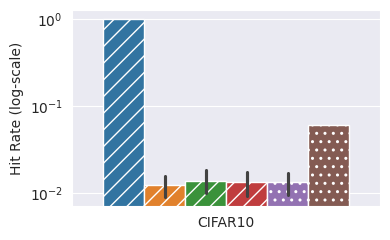

In [12]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(data = df, x='data', y='hit_rate', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\', '**']
ax.set_yscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,4)
sns.set_style("darkgrid")

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

plt.xlabel("")
plt.ylabel('Hit Rate (log-scale)')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/noise_hitrate_trak.pdf', format='pdf')

/tmp/ipykernel_86386/2922229354.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


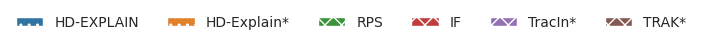

In [13]:
fig_leg = plt.figure(figsize=(8, 0.2))
ax_leg = fig_leg.add_subplot(111)
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=6, frameon=False)
ax_leg.axis('off')
plt.tight_layout()
fig_leg.savefig('plots/bar_legend_trak.pdf', format='pdf')

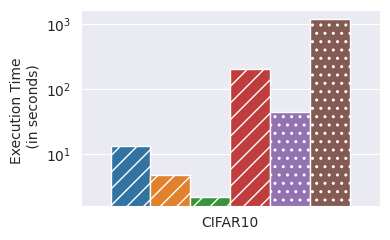

In [14]:
fig = plt.figure(figsize=(4, 2.5))
ax = sns.barplot(data = df, x='data', y='execution_time', hue='names', width=0.8)
# Define some hatches
pattern=['//','..','xx','', '\\\\', '**']
ax.set_yscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
hatches=np.repeat(pattern,4)
sns.set_style("darkgrid")

for pat,bar in zip(hatches,ax.patches):
    bar.set_hatch(pat)

plt.xlabel("")
plt.ylabel('Execution Time \n (in seconds)')

# plt.legend(bbox_to_anchor=(0.6, 0.50))

plt.tight_layout()
plt.savefig('plots/noise_time_trak.pdf', format='pdf')

In [14]:
df1 = load_dataframe_csv('random_noise_tables', 'Explainability_kernel_CIFAR10.csv')
df2 = load_dataframe_csv('random_noise_tables', 'Explainability_kernel_OCEA.csv')
df3 = load_dataframe_csv('random_noise_tables', 'Explainability_kernel_MRI.csv')
df4 = load_dataframe_csv('random_noise_tables', 'Explainability_kernel_SVHN.csv')
df = pd.concat([df1, df2, df3, df4])
df['data'][df['data']=='OCEA'] = 'OCH'
df.head()

/tmp/ipykernel_160131/368722484.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['data'][df['data']=='OCEA'] = 'OCH'
/tmp/ipykernel_160131/368722484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,data,kernel,scale,coverage,hit_rate,execution_time
0,CIFAR10,RBF,False,0.903333,1.00,13.022575
1,CIFAR10,IMQ,False,0.903333,1.00,12.922055
2,CIFAR10,Linear,False,0.806667,0.81,3.994959
3,CIFAR10,RBF,False,0.940000,0.99,12.879740
4,CIFAR10,IMQ,False,0.936667,1.00,12.943490


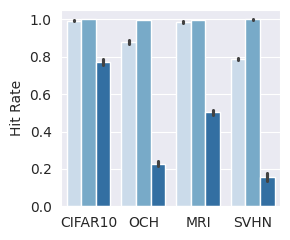

In [15]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.barplot(df, x='data', y='hit_rate', hue='kernel', width=0.8, palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Hit Rate')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/kernel_hitrate.pdf', format='pdf')

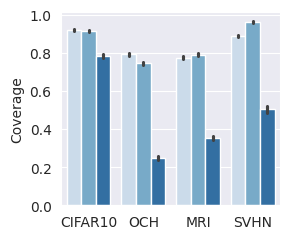

In [16]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.barplot(df, x='data', y='coverage', hue='kernel', width=0.8, palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Coverage')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/kernel_coverage.pdf', format='pdf')

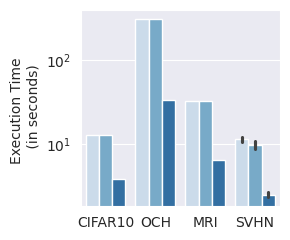

In [17]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.barplot(df, x='data', y='execution_time', hue='kernel', width=0.8, palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.set_yscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Execution Time \n (in seconds)')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/kernel_time.pdf', format='pdf')

/tmp/ipykernel_160131/54392684.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


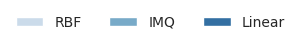

In [18]:
fig_leg = plt.figure(figsize=(3, 0.2))
ax_leg = fig_leg.add_subplot(111)
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=3, frameon=False)
ax_leg.axis('off')
plt.tight_layout()
fig_leg.savefig('plots/kernel_bar_legend.pdf', format='pdf')

In [17]:
df1 = load_dataframe_csv('tables', 'Explainability_temperature_CIFAR10.csv')
df2 = load_dataframe_csv('tables', 'Explainability_temperature_OCEA.csv')
# mahtab - remove MRI
# df3 = load_dataframe_csv('tables', 'Explainability_temperature_MRI.csv')
df3 = load_dataframe_csv('tables', 'Explainability_temperature_SVHN.csv')
df = pd.concat([df1, df2, df3])
df['data'][df['data']=='OCEA'] = 'OCH'
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'tables/Explainability_temperature_MRI.csv'

In [19]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.lineplot(data=df, x='temperature', y='coverage', hue='data')
# Define some hatches
# pattern=['//','..','xx','']
ax.set_xscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Coverage')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/temperature_hitrate.pdf', format='pdf')

ValueError: Could not interpret value `temperature` for parameter `x`

<Figure size 216x180 with 0 Axes>

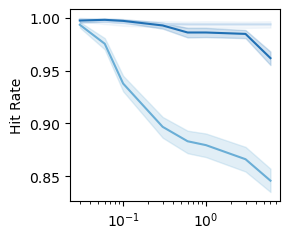

In [113]:
fig = plt.figure(figsize=(3, 2.5))
ax = sns.lineplot(df, x='temperature', y='hit_rate', hue='data', palette=sns.color_palette("Blues", 3))
# Define some hatches
# pattern=['//','..','xx','']
ax.set_xscale("log")
ax.legend_.remove()
# replace 2 with 7 in your code
# hatches=np.repeat(pattern,3)

# for pat,bar in zip(hatches,ax.patches):
#     bar.set_hatch(pat)

plt.xlabel('')
plt.ylabel('Hit Rate')

# plt.legend(bbox_to_anchor=(0.35, 0.33))

plt.tight_layout()
plt.savefig('plots/temperature_hitrate.pdf', format='pdf')